# 1. K-Means Clustering

### Librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Dataset sintético

### 1. Carga y visualización de los datos

In [2]:
data = np.load('data/data_kmeans.npz')
print(f"Type of data: {type(data)}\n")

X = data['X']
print(f"X.shape: {X.shape}\n")
print(f"{X[:5]}")

Type of data: <class 'numpy.lib.npyio.NpzFile'>

X.shape: (300, 2)

[[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]


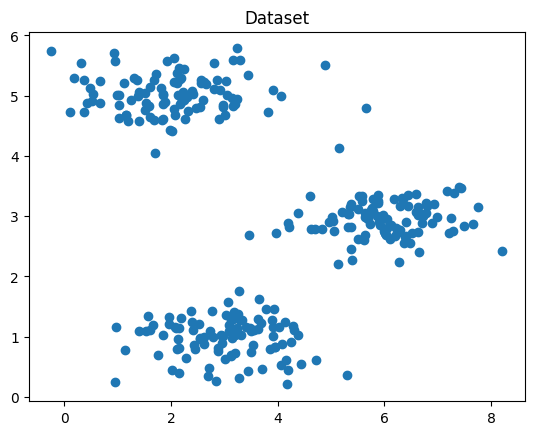

In [3]:
# Plotting the dataset
plt.scatter(X[:,0],X[:,1])
plt.title("Dataset")
plt.show()

### 2. Desarrollo manual del algoritmo

Establecemos los parámetros para K-Means, número de clusters y límite de iteraciones.

In [4]:
K = 3;
max_iters = 100;

A continuación preparamos las funciones necesarias para resolver el algoritmo.

Comenzamos con una función para inicializar los centroides con muestras aleatorias del dataset, la cual k muestras diferentes del dataset.

In [5]:
# Intialize the cluster centroid with unique random samples from the  dataset
def initCentroids(X,K):
    flag = True
    while flag: 
        pos = np.random.choice(X.shape[0],K,replace = False)
        centroids = X[pos]
        if np.unique(centroids,axis =0).shape[0] == K:
            flag = False
    return centroids

In [6]:
# Randomly intializing cluster centroid from the dataset
init_c = initCentroids(X,K)
print(f"Initial centroids:\n{init_c}\n")

Initial centroids:
[[2.05288518 4.77958559]
 [2.12169543 5.20854212]
 [4.18450011 0.45356203]]



Otra función para asignar los puntos del dataset al centroide más cercano. Se calcula la distancia de cada punto a cada centroide y se asigna al centroide más cercano.

In [7]:
# Cluster Assignment
def closestCentroids(X,centroids):
    idx = np.empty(X.shape[0])
    for i in range(idx.size):
        temp = X[i]
        c = np.sum((centroids - temp) **2,axis=1)
        pos = np.argmin(c)
        idx[i] = pos
    return idx

Por último una función para recalcular los centroides en función de los puntos asignados a cada uno.

In [8]:
# Move Centroid
def computeCentroids(X,idx,k):
    centroids = np.zeros((k,X.shape[1]))
    for i in range(k):
        pos = np.nonzero(idx == i)
        centroids[i] = np.mean(X[pos],axis =0)
    return centroids 

Combinamos todo lo anterior en una función que ejecuta el algoritmo de K-Means.

In [9]:
# K-means Function
def kMeans(X, K, max_iters):
    centroids = initCentroids(X,K)
    idx = np.empty(X.shape[0])
    for i in range(max_iters):
        # Cluster Assignment step
        idx = closestCentroids(X,centroids)
        # Move Centroid Step
        centroids = computeCentroids(X,idx,K)
    
    return centroids

#### Ejecutamos el algoritmo

In [10]:
# Calling K-means to compute centroids and centroid assignments
centroids = kMeans(X, K, max_iters)
print(f"Final centroids:\n{centroids}\n")

Final centroids:
[[4.51637285 1.9665885 ]
 [1.21011688 4.97066073]
 [2.76831718 5.08116967]]



In [11]:

idx = closestCentroids(X,centroids)
print(f"Final centroid assignments:\n{idx}\n")

Final centroid assignments:
[1. 2. 0. 2. 2. 1. 1. 2. 2. 2. 2. 2. 1. 2. 1. 2. 2. 2. 1. 2. 1. 2. 2. 1.
 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 1. 2. 1. 2. 2. 1. 1. 2. 2. 1. 1. 2. 2. 2.
 1. 2. 1. 1. 2. 2. 2. 2. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 2. 1. 2. 1. 2. 1.
 1. 1. 2. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 1. 2. 2. 2. 1. 2. 2. 2.
 2. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]



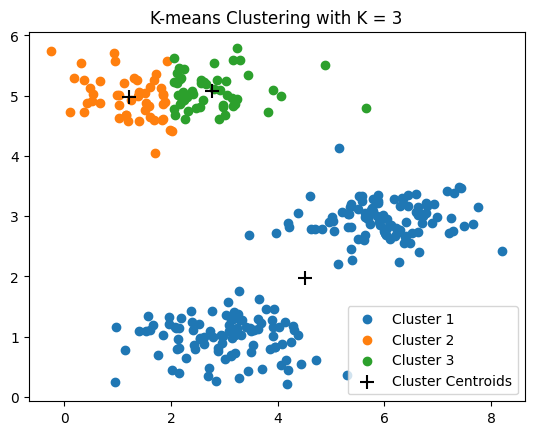

In [12]:
# Plotting the output of K-means clustering, with colors representing different clusters 
for i in range(K):
    pos = np.nonzero(idx == i)
    plt.scatter(X[pos,0],X[pos,1],label="Cluster %d" %(i+1))
plt.scatter(centroids[:,0],centroids[:,1],c='k',marker='+',s=100,label='Cluster Centroids')
plt.legend(loc='best')
plt.title("K-means Clustering with K = %d" %K)
plt.show()

### 3. Algoritmo generado con Chat GPT 

Puede generarse un ejemplo usando el siguiente prompt:

```markdown
    give me python code for a kmeans algorithm in python
```

Chat GPT nos genera las funciones necesarias para ejecutar el algoritmo de K-Means.

In [13]:
import numpy as np

def initialize_centroids(points, k):
    """Randomly initialize k centroids from the dataset."""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """Assign each point to the closest centroid."""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """Reposition each centroid to the mean of the points assigned to it."""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

def kmeans(points, k, max_iters=100):
    """K-means algorithm implementation."""
    centroids = initialize_centroids(points, k)
    for _ in range(max_iters):
        closest = closest_centroid(points, centroids)
        new_centroids = move_centroids(points, closest, centroids)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return centroids, closest

También podemos generar una función para visualizar los datos:

```markdown
    plot the results, with a different color per cluster
```

In [14]:
def plot_kmeans(points, centroids, closest, k):
    """Plot the results of K-means clustering with different colors per cluster."""
    colors = ['r', 'g', 'b', 'y', 'c', 'm']  # Extend this list for more clusters
    for i in range(k):
        # Plot points assigned to cluster i
        plt.scatter(points[closest == i, 0], points[closest == i, 1], s=20, c=colors[i], label=f'Cluster {i}')
        # Plot centroid i
        plt.scatter(centroids[i, 0], centroids[i, 1], s=100, c=colors[i], marker='X', edgecolor='k', label=f'Centroid {i}')
    plt.title('K-means Clustering Results')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    plt.show()

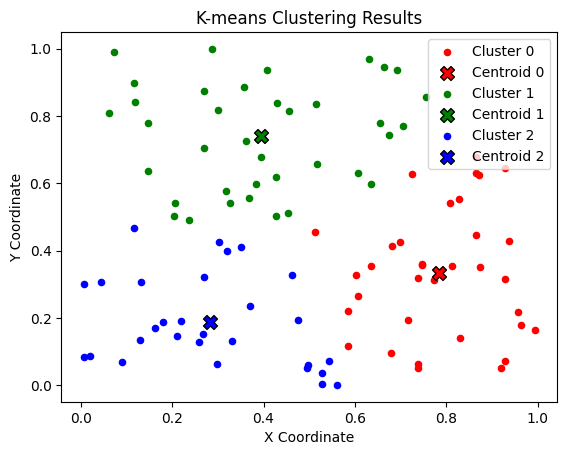

In [15]:
# Assuming `points`, `centroids`, and `closest` are defined from the previous step
points = np.random.rand(100, 2)  # 100 2D points
k = 3
centroids, closest = kmeans(points, k)

# Now, plot the results
plot_kmeans(points, centroids, closest, k)

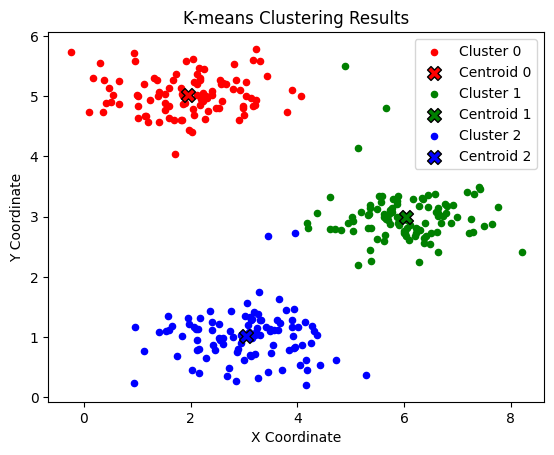

In [16]:
k = 3
centroids, closest = kmeans(X, k)
plot_kmeans(X, centroids, closest, k)

### 4. Scikit-learn

c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


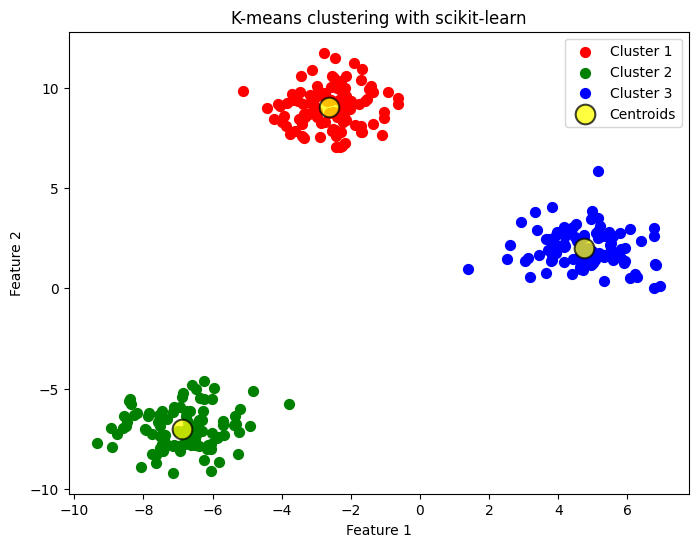

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 300
random_state = 42
X, _ = make_blobs(n_samples=n_samples, random_state=random_state, centers=3)

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=random_state)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', alpha=0.75, edgecolor='black', linewidth=1.5, label='Centroids')
plt.title('K-means clustering with scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


c:\Users\icira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


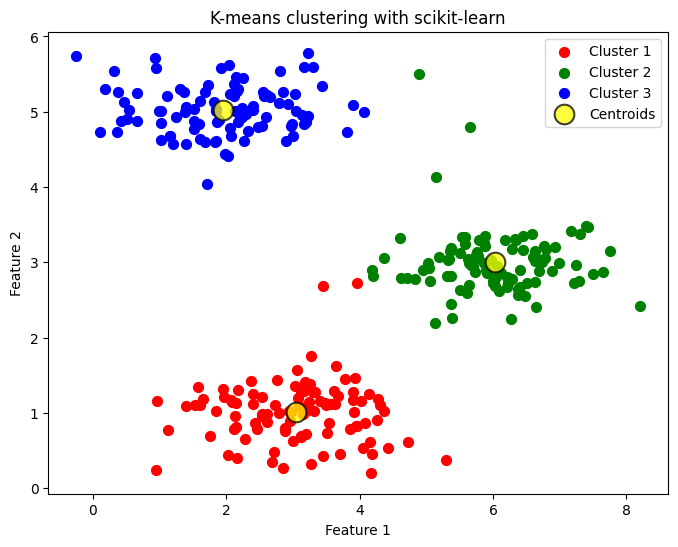

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Load the dataset
data = np.load('data/data_kmeans.npz')
X = data['X']

# Apply K-means clustering
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=random_state)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=200, c='yellow', alpha=0.75, edgecolor='black', linewidth=1.5, label='Centroids')
plt.title('K-means clustering with scikit-learn')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


### 5. DBSCAN

Para resolver un problema de clustering utilizando el algoritmo DBSCAN con scikit-learn, puede utilizar la clase DBSCAN del módulo sklearn.cluster. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un popular algoritmo de clustering que es ideal para tareas en las que los clusters tienen una forma irregular y hay ruido en los datos. A diferencia de K-means, DBSCAN no requiere especificar de antemano el número de clusters.

El siguiente código:

- Aplica la agrupación DBSCAN a los datos. El parámetro eps especifica la distancia máxima entre dos muestras para que se consideren en el mismo vecindario. El parámetro min_samples es el número de muestras en un vecindario para que un punto sea considerado como punto núcleo.

- Identifica las muestras centrales y las etiqueta. DBSCAN etiqueta las muestras ruidosas como -1.

- Traza los resultados, donde cada cluster se muestra en un color diferente, y el ruido se muestra en negro.

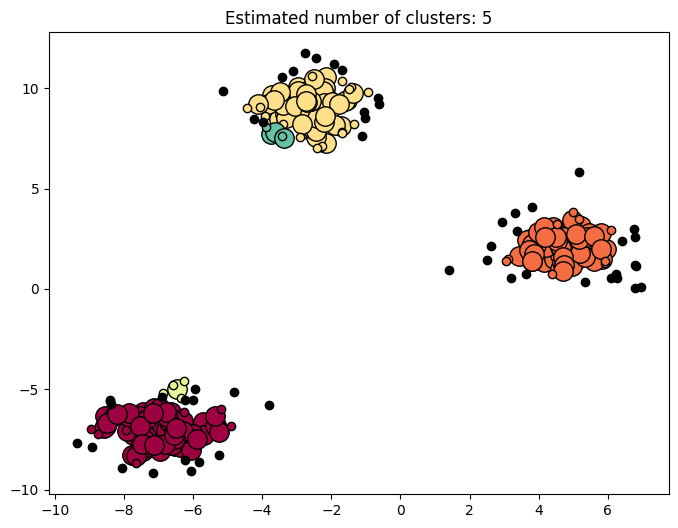

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Generate synthetic data
n_samples = 300
random_state = 42
X, _ = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # These parameters might need adjustment for your dataset
dbscan.fit(X)

# Get the core samples and the labels
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()


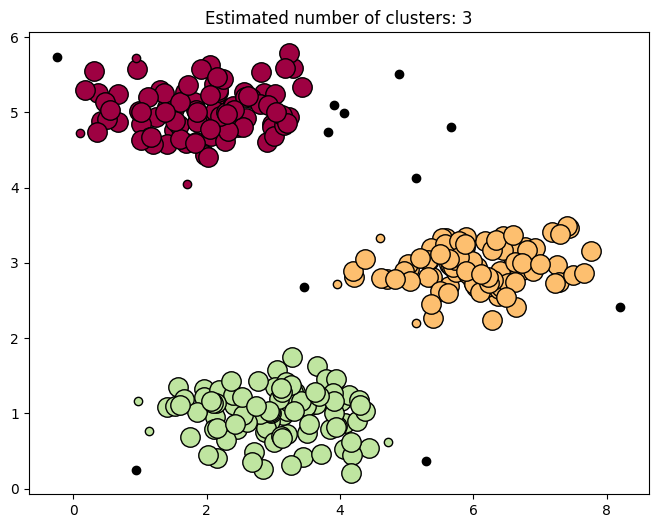

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Load the dataset
data = np.load('data/data_kmeans.npz')
X = data['X']

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # These parameters might need adjustment for your dataset
dbscan.fit(X)

# Get the core samples and the labels
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

# Number of clusters in labels, ignoring noise if present
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
unique_labels = set(labels)

# Plot the clustered data
plt.figure(figsize=(8, 6))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}')
plt.show()

### 6. Hierarchical Clustering

Para realizar clustering jerárquico con scikit-learn, puede utilizar la clase AgglomerativeClustering del módulo sklearn.cluster. La agrupación jerárquica es un método de análisis de conglomerados que busca construir una jerarquía de conglomerados. No requiere que se especifique de antemano el número de conglomerados y es especialmente útil para estudios detallados de la estructura de los datos.

El siguiente código:

- Aplica clustering jerárquico a los datos con AgglomerativeClustering. Establecer distance_threshold=0 y n_clusters=None significa que la agrupación continúa hasta que todos los clusters se fusionan en uno. El parámetro linkage='ward' minimiza la varianza de los clusters que se fusionan.
- Define una función plot_dendrogram para trazar el dendrograma de la agrupación jerárquica, utilizando la matriz de vinculación creada a partir de model.children_, model.distances_, y los recuentos de muestras bajo cada nodo.
- Traza el dendrograma, que proporciona un resumen visual del proceso de clustering, incluyendo el orden de las fusiones y la jerarquía de los clusters.



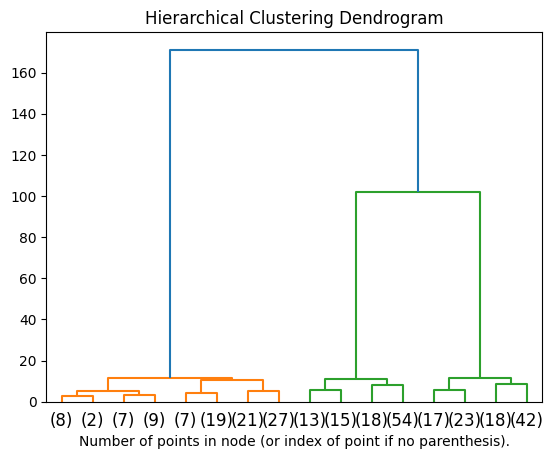

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

# Generate synthetic data
n_samples = 300
random_state = 42
X, _ = make_blobs(n_samples=n_samples, centers=3, random_state=random_state)

# Apply Hierarchical Clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X)

# This function plots the dendrogram for the clustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


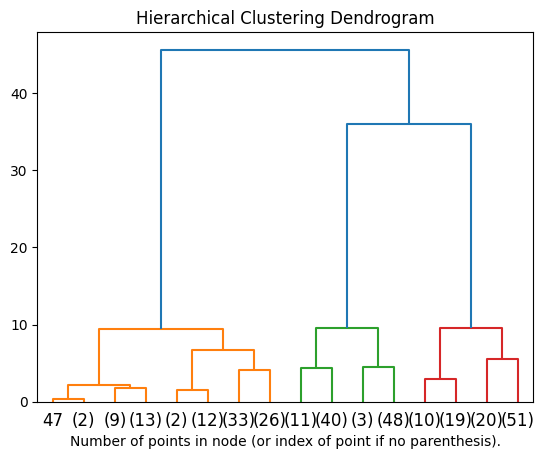

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

# Load the dataset
data = np.load('data/data_kmeans.npz')
X = data['X']

# Apply Hierarchical Clustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X)

# This function plots the dendrogram for the clustering
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)
    dendrogram(linkage_matrix, **kwargs)

plt.title('Hierarchical Clustering Dendrogram')
# Plot the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# 2. Compresión de imágenes

K-Means puede usarse para comprimir imágenes. Para ello, se usa el algoritmo de K-Means para reducir el número de colores.

(128, 128, 3)


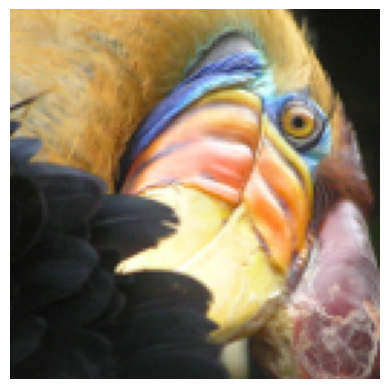

In [23]:
A = plt.imread('data/bird_small.png')
print(A.shape)
plt.imshow(A)
plt.axis('off')
plt.show()

En una imagen a color de 24 bits, cada píxel se representa como tres enteros sin signo de 8 bits que especifican los valores de intensidad del rojo, el verde y el azul ($2^8$ colores). 

$$px^{(ij)} = \begin{bmatrix} R & G & B \end{bmatrix}$$

$$Img = \begin{bmatrix} px^{(00)} & px^{(01)} & \cdots & px^{(0n)} \\ px^{(10)} & px^{(11)} & \cdots & px^{(1n)} \\ \vdots & \vdots & \ddots & \vdots \\ px^{(m0)} & px^{(m1)} & \cdots & px^{(mn)} \end{bmatrix}$$

Esta codificación suele denominarse codificación RGB. Nuestra imagen contiene miles de colores, y en esta parte del ejercicio, reduciremos el número de colores a 16 colores.

Tratamos cada píxel de la imagen original como un ejemplo de datos y utilizamos el algoritmo K-means para encontrar los 16 colores que mejor agrupan (cluster) los píxeles en el espacio RGB tridimensional. Una vez calculados los centroides de los grupos en la imagen, utilizaremos los 16 colores para sustituir los píxeles de la imagen original.

In [24]:
# Setting the constants for K-means
K = 16;
max_iters = 100;

Redimensionamos la imagen a una matriz de píxeles de tamaño m x 3, dónde m es el número de píxeles en la imagen. Cada fila de esta matriz es un píxel de la imagen original.

In [25]:
img = A.reshape(-1,3)
img.shape

(16384, 3)

Resolvemos el problema utilizando las funciones de K-Means que hemos creado anteriormente.

In [26]:
# Calling K-means to compute centroids and centroid assignments
centroids = kMeans(img,K,max_iters)
idx = closestCentroids(img,centroids)

In [27]:
# Assigning the pixel values of the new image to their cluster centroid values 
idx = idx.astype(int)
img_compress = centroids[idx]

# Reshaping ot back to 128*128*3
img_compress = img_compress.reshape(A.shape)

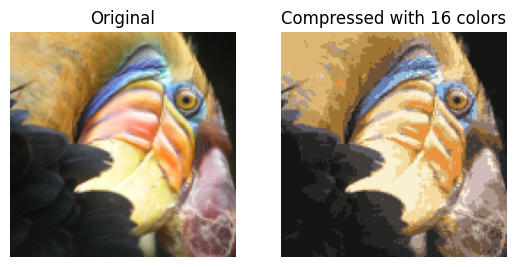

In [28]:
# Plotting both the original and compressed image
plt.subplot(1,2,1)
plt.imshow(A)
plt.title('Original')
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(img_compress)
plt.title('Compressed with 16 colors')
plt.axis("off")
plt.show()

La imagen original requiere 24 bits para cada uno de los 128×128 píxeles, lo que da un tamaño total de 128 × 128 × 24 = 393.216 bits. 

La nueva representación requiere una cierta sobrecarga de almacenamiento en forma de diccionario de 16 colores, cada uno de los cuales requiere 24 bits, pero la imagen en sí sólo necesita 4 bits por píxel. El número final de bits utilizados es, por tanto, 16 × 24 + 128 × 128 × 4 = 65.920 bits, lo que equivale a comprimir la imagen original en un factor de 6. Por tanto, hemos comprimido la imagen de forma significativa.  
  
Aunque la imagen resultante conserva la mayoría de las características de la original, también se observan algunos artefactos de compresión.